In [1]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics
df = pd.read_csv('train (2).csv')
df.head(5)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [2]:
df.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [3]:
print("Null values per Column in Training Dataset:\n",df.isnull().sum(axis = 0))

Null values per Column in Training Dataset:
 state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64


In [4]:
df[df.duplicated(keep=False)]


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn


In [5]:
df.dtypes

state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

In [6]:
import matplotlib.pyplot as plt

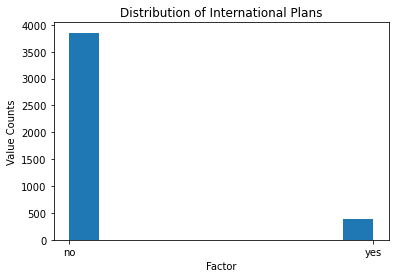

In [7]:
plt.hist(df['international_plan'])
plt.title("Distribution of International Plans")
plt.ylabel("Value Counts")
plt.xlabel("Factor")
plt.show()

In [8]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [9]:
numeric = df[['number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls']]
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(numeric)
# transform training data
normal_numeric_data = norm.transform(numeric)
cols = numeric.columns.values
# normalized data to dataframe
normal_numeric_data = pd.DataFrame(data = normal_numeric_data, columns = cols)
normal_numeric_data.head(5)

,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,0.500000,0.459744,0.745455,0.459672,0.544114,0.605882,0.544204,0.644051,0.588571,0.644344,0.685,0.15,0.685185,0.111111
1,0.000000,0.692461,0.690909,0.692436,0.337323,0.647059,0.337263,0.411646,0.594286,0.411930,0.610,0.25,0.609259,0.000000
2,0.000000,0.851778,0.430303,0.851740,0.172279,0.517647,0.172233,0.498481,0.508571,0.498593,0.330,0.35,0.329630,0.222222
3,0.000000,0.474253,0.684848,0.474230,0.412747,0.717647,0.412901,0.473165,0.691429,0.473270,0.505,0.15,0.505556,0.333333
4,0.461538,0.620768,0.533333,0.620649,0.969942,0.635294,0.969876,0.538228,0.674286,0.538548,0.375,0.35,0.375926,0.333333


In [10]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Categorical = df[['international_plan','voice_mail_plan','churn']]
Categorical = Categorical.apply(LabelEncoder().fit_transform)
Categorical.head(5)

,international_plan,voice_mail_plan,churn
0,0,1,0
1,0,0,0
2,1,0,0
3,1,0,0
4,0,1,0


In [11]:
import warnings
warnings.filterwarnings('ignore')
total_data = numeric
total_data['international_plan'] = Categorical.international_plan
total_data['voice_mail_plan'] = Categorical.voice_mail_plan
total_data['churn'] = Categorical.churn
total_data.head(5)

,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,international_plan,voice_mail_plan,churn
0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,1,0
1,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0,0
2,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,1,0,0
3,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,1,0,0
4,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0,1,0


Feature 0: 30.133387
Feature 1: 153.101652
Feature 2: 0.031118
Feature 3: 153.084723
Feature 4: 23.800096
Feature 5: 0.366393
Feature 6: 23.797432
Feature 7: 14.032573
Feature 8: 0.003956
Feature 9: 14.027386
Feature 10: 7.758674
Feature 11: 5.858407
Feature 12: 7.754311
Feature 13: 140.831230
Feature 14: 198.016516
Feature 15: 40.598683


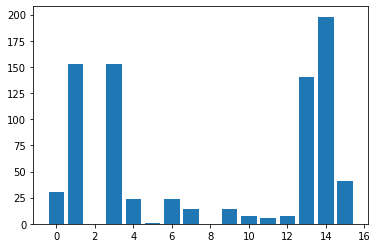

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_classif, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
# load the dataset
l = len(total_data.columns.values)
l = l - 1
X = total_data.iloc[:,0:l]
y = total_data.churn
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [13]:
score = []
score = fs.scores_
selected_feature = []
i = 0
while i<len(score):
    if score[i] > 15:
        selected_feature.append(i)
    i = i+1
print("These Feature Has been Selected: ",selected_feature)
print()
print("Getting indexes the Actual Data Columns:")
print()
i = 0
while i<len(total_data.columns):
    print("Index: ",i," ",total_data.columns[i])
    i = i+1
final_selected_df = pd.DataFrame()
final_selected_df['number_vmail_messages'] = total_data['number_vmail_messages']
final_selected_df['total_day_minutes'] = total_data['total_day_minutes']
final_selected_df['total_day_charge'] = total_data['total_day_charge']
final_selected_df['total_eve_minutes'] = total_data['total_eve_minutes']
final_selected_df['total_eve_charge'] = total_data['total_eve_charge']
final_selected_df['number_customer_service_calls'] = total_data['number_customer_service_calls']
final_selected_df['international_plan'] = total_data['international_plan']
final_selected_df['voice_mail_plan'] = total_data['voice_mail_plan']
final_selected_df['churn'] = total_data['churn']
final_selected_df.head(5)

These Feature Has been Selected:  [0, 1, 3, 4, 6, 13, 14, 15]

Getting indexes the Actual Data Columns:

Index:  0   number_vmail_messages
Index:  1   total_day_minutes
Index:  2   total_day_calls
Index:  3   total_day_charge
Index:  4   total_eve_minutes
Index:  5   total_eve_calls
Index:  6   total_eve_charge
Index:  7   total_night_minutes
Index:  8   total_night_calls
Index:  9   total_night_charge
Index:  10   total_intl_minutes
Index:  11   total_intl_calls
Index:  12   total_intl_charge
Index:  13   number_customer_service_calls
Index:  14   international_plan
Index:  15   voice_mail_plan
Index:  16   churn


,number_vmail_messages,total_day_minutes,total_day_charge,total_eve_minutes,total_eve_charge,number_customer_service_calls,international_plan,voice_mail_plan,churn
0,26,161.6,27.47,195.5,16.62,1,0,1,0
1,0,243.4,41.38,121.2,10.30,0,0,0,0
2,0,299.4,50.90,61.9,5.26,2,1,0,0
3,0,166.7,28.34,148.3,12.61,3,1,0,0
4,24,218.2,37.09,348.5,29.62,3,0,1,0
